In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib widget


In [16]:
podaci = pd.read_csv("mouse.csv", header=None)

In [17]:
podaci

0         1  2
0    0.456601  0.432806  1
1    0.611378  0.528625  1
2    0.450299  0.711606  1
3    0.639015  0.460744  1
4    0.628957  0.323470  1
..        ...       ... ..
495  0.151506  0.876586  4
496  0.860308  0.633833  4
497  0.862083  0.591805  4
498  0.916030  0.523391  4
499  0.427325  0.833767  4

[500 rows x 3 columns]

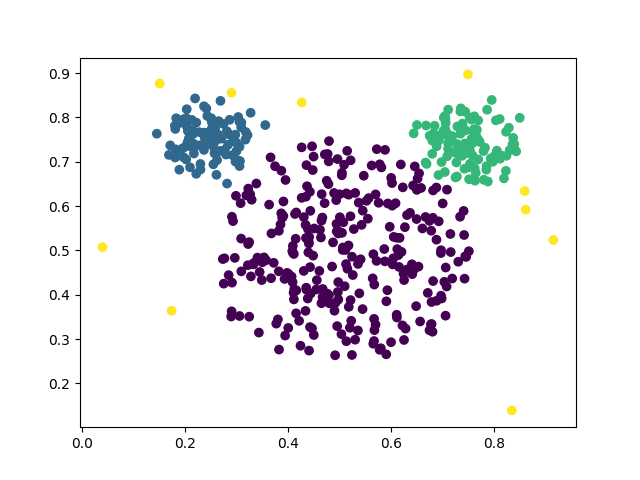

In [18]:
plt.figure()
plt.scatter(podaci[0], podaci[1], c=podaci[2])
plt.show()

In [19]:
def kmeans(podaci, k, epsilon=0.00001, maksimalno_koraka = 1000):
    istorija_centara = []
    centri = np.random.rand(k, len(podaci[0]))
    i = 0
    azuriraj = True
    
    while azuriraj and i < maksimalno_koraka:
        i += 1
        grupe = [list() for i in range(k)]
        for p in podaci:
            udaljenosti = []
            for c in centri:
                udaljenosti.append(np.sum((p-c)**2))
            grupe[np.argmin(udaljenosti)].append(p)

        novi_centri = np.zeros(centri.shape)
        for i, g in enumerate(grupe):
            novi_centri[i] = np.average(np.array(g), 0)
            
        azuriraj = np.any(np.sum((centri - novi_centri)**2) > epsilon)
        
        centri = novi_centri
    
    print(i)
    return centri, grupe

In [20]:
centri, _ = kmeans(podaci[[0, 1]].to_numpy(), 3, 0.000001)

2


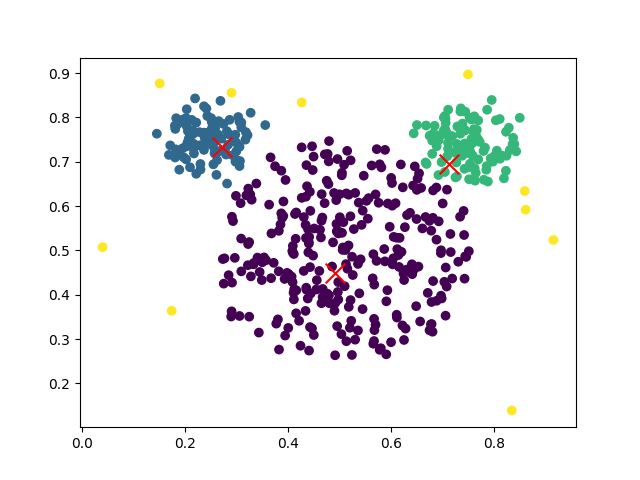

In [21]:
plt.figure()
plt.scatter(podaci[0], podaci[1], c=podaci[2])
plt.scatter(centri[:, 0], centri[:, 1], c="r", marker="x", s=200)
plt.show()

In [22]:
centri, grupe = kmeans(podaci[[0, 1]].to_numpy(), 3)
plt.figure()
plt.scatter(podaci[0], podaci[1], c=podaci[2])
plt.scatter(np.array(grupe[0])[:, 0], np.array(grupe[0])[:, 1], c="r", marker="+", s=100)
plt.scatter(np.array(grupe[1])[:, 0], np.array(grupe[1])[:, 1], c="g", marker="+", s=100)
plt.scatter(np.array(grupe[2])[:, 0], np.array(grupe[2])[:, 1], c="b", marker="+", s=100)
# plt.scatter(grupe[1][:, 0], grupe[1][:, 1], c="g", marker="+", s=100)
# plt.scatter(grupe[2][:, 0], grupe[2][:, 1], c="b", marker="+", s=100)
plt.scatter(centri[:, 0], centri[:, 1], c="r", marker="x", s=200)
plt.show()

2


In [23]:
%matplotlib widget

from struct import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def ucitavanje_slika(putanja):
    with open(putanja, "rb") as fp:
        magic_number = unpack(">I", fp.read(4))
        broj_slika = unpack(">I", fp.read(4))[0]
        broj_redova = unpack(">I", fp.read(4))[0]
        broj_kolona = unpack(">I", fp.read(4))[0]
        
        slike = np.frombuffer(fp.read(broj_slika*broj_redova*broj_kolona), dtype=np.uint8).reshape((broj_slika, broj_redova, broj_kolona))

        return slike

def ucitavanje_labela(putanja):
    with open(putanja, "rb") as fp:
        magic_number = unpack(">I", fp.read(4))
        broj_labela = unpack(">I", fp.read(4))[0]
        labele = np.frombuffer(fp.read(broj_labela), dtype=np.uint8)
        return labele

train_slike = ucitavanje_slika("train-images.idx3-ubyte")
train_labele = ucitavanje_labela("train-labels.idx1-ubyte")

test_slike = ucitavanje_slika("t10k-images.idx3-ubyte")
test_labele = ucitavanje_labela("t10k-labels.idx1-ubyte")

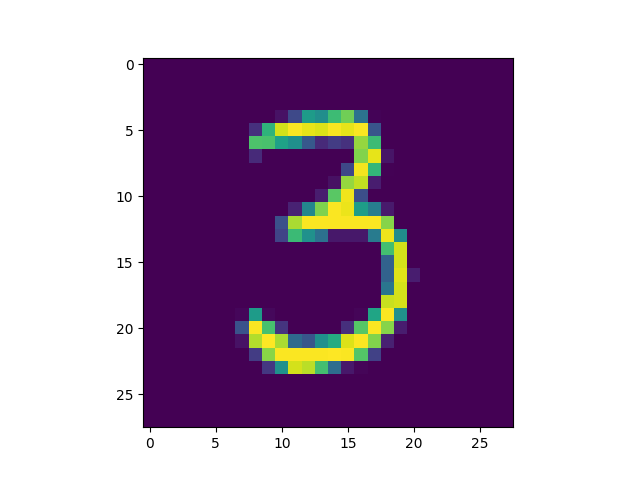

In [24]:
plt.figure()
plt.imshow(train_slike[50])
plt.show()

In [25]:
slike = train_slike.reshape(train_slike.shape[0], train_slike.shape[1]*train_slike.shape[2])/255

In [26]:
centri, grupe = kmeans(slike, 10)

9


e:\singidunum\materijali\ml-okruzenje\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
e:\singidunum\materijali\ml-okruzenje\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


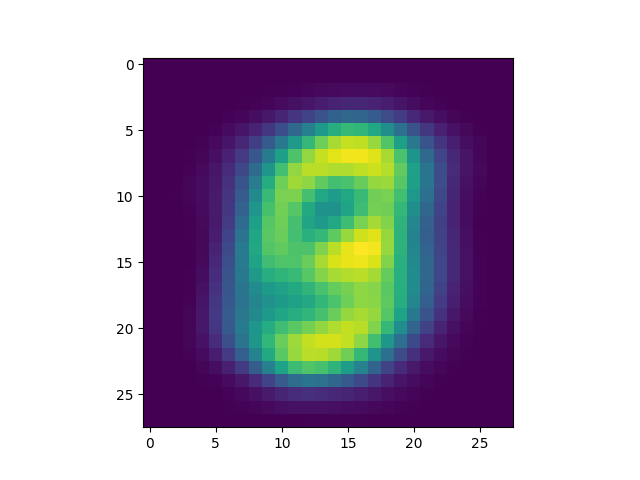

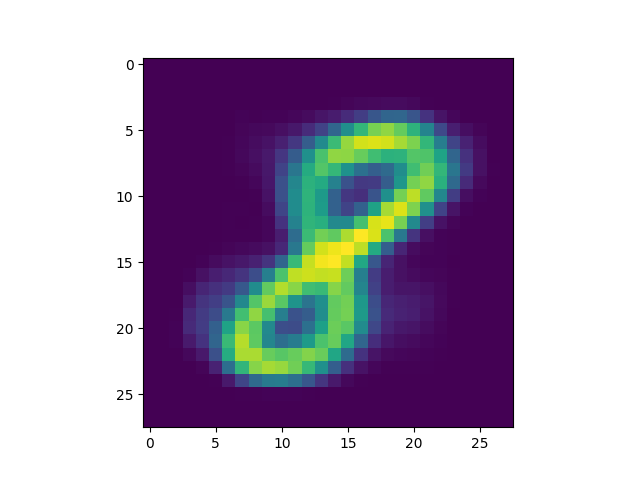

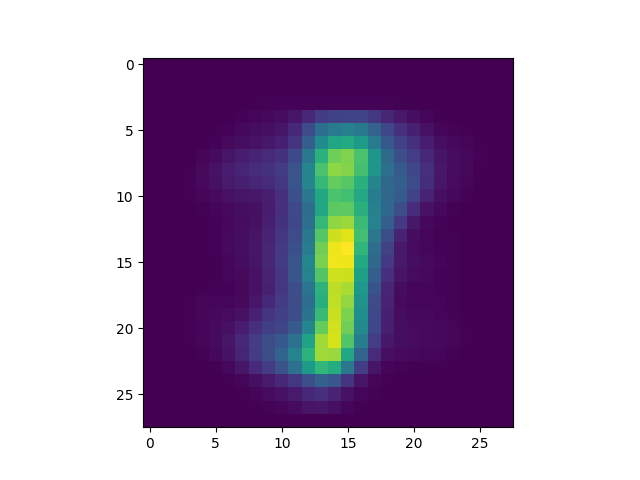

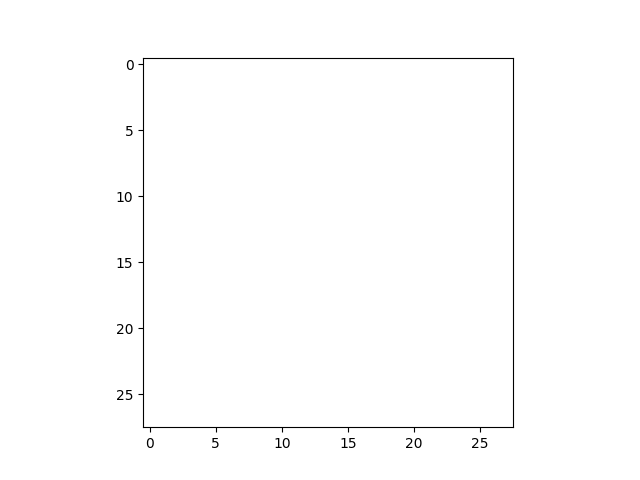

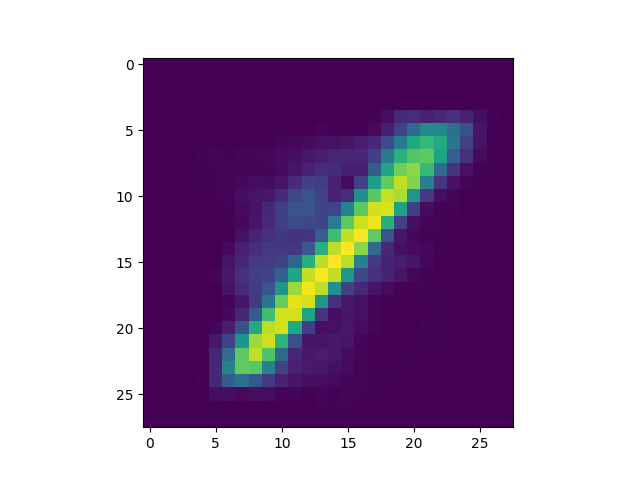

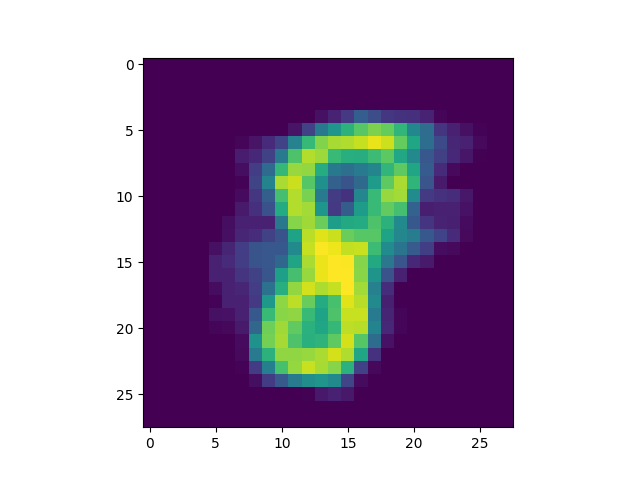

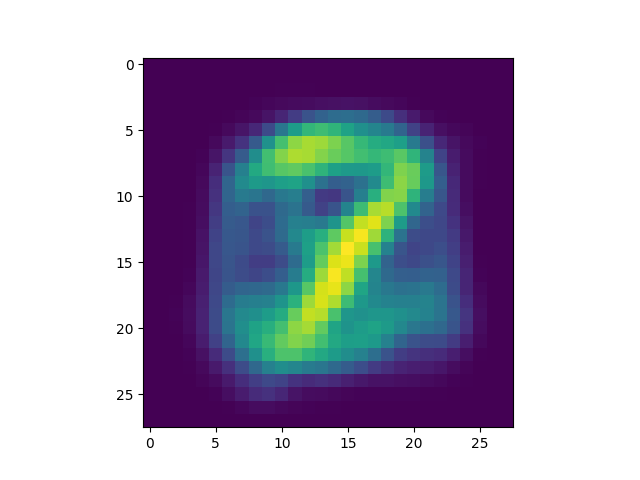

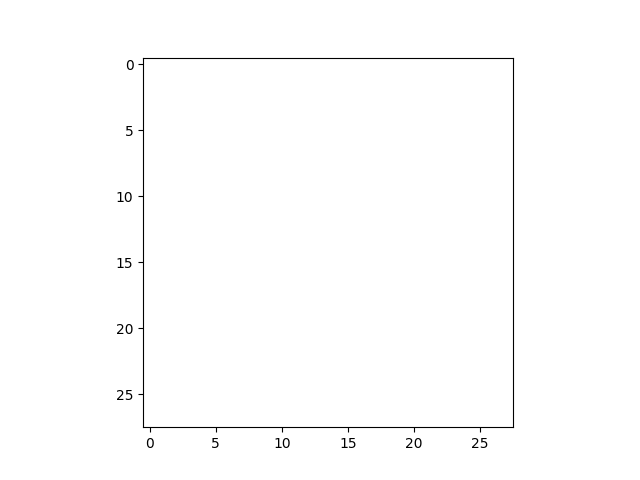

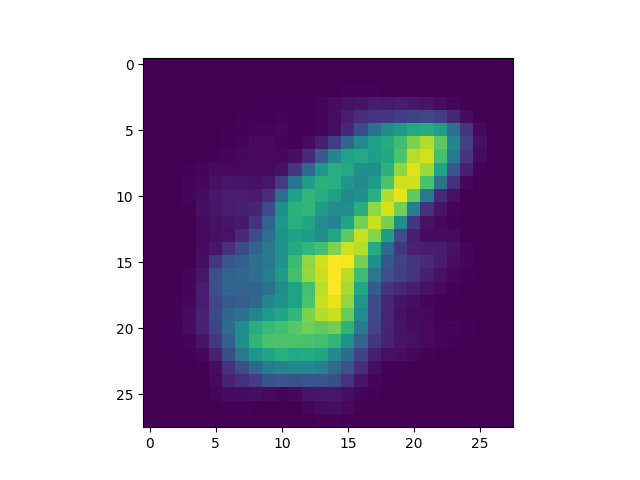

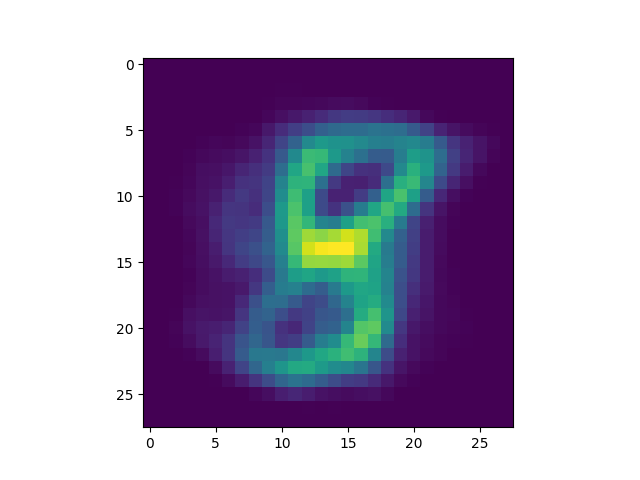

In [13]:
for i in range(10):
    plt.figure()
    plt.imshow(centri[i].reshape(28, 28))
    plt.show()

IndexError: list index out of range

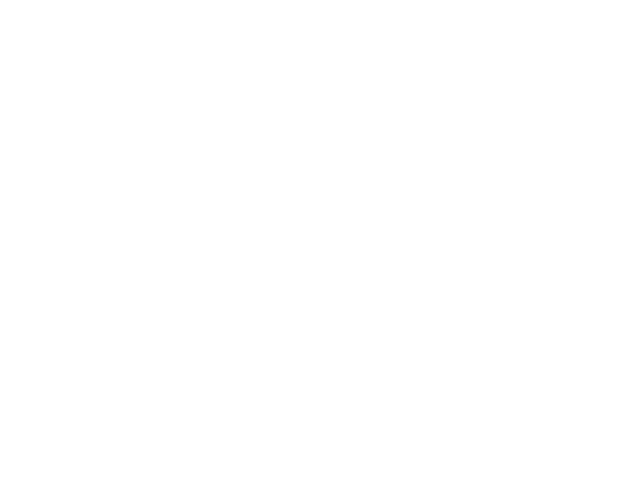

In [14]:
plt.figure()
plt.imshow(grupe[-2][150].reshape(28, 28))
plt.show()